In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
df = pd.read_csv("../data/df_july.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754466 entries, 0 to 1754465
Data columns (total 26 columns):
city                           object
bar_id                         int64
order_id                       int64
order_time                     object
order_item_id                  int64
title                          object
category_id                    float64
beer_brand_id                  int64
beer_serving_type_id           int64
beer_volume                    float64
item_qty                       float64
sales_before_tax               float64
sales_inc_tax                  float64
guest_count                    int64
waiter_id                      float64
country                        object
country_id                     int64
state                          object
state_id                       int64
timezone                       object
bar_type_id                    int64
status                         int64
last_status                    int64
is_bulk           

In [133]:
df.order_id.nunique()

391683

In [129]:
df.drop("country",axis=1,inplace=True) # only single country, no need
df = df[df["bar_type"]!= "Night Club"] # only 83 rows from Night Club 
df.drop(["data_availability_status_id","is_bulk","status","last_status","state","state_id","waiter_id","country_id"],axis=1,inplace=True) # only single country, no need



In [131]:
pub_df = df[df["bar_type"] == "Bar/Pub"]


In [134]:
pub_df.order_id.nunique()

180998

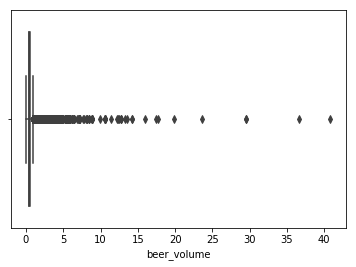

In [135]:
pub_df.loc[df.sales_inc_tax>0].beer_volume.describe()
sns.boxplot(x=pub_df.loc[df.beer_volume>0].beer_volume)
# pub_df.loc[df.beer_volume>5].beer_volume.describe()
# 125 rows has more than 5 liters in their beer volume


In [136]:
pub_df.order_id[pub_df.beer_volume > 2.5].nunique()

574

In [137]:
pub_df = pub_df[~pub_df.order_id.isin(pub_df.order_id[pub_df.beer_volume > 2.5].unique())]


In [138]:
pub_df.order_id.nunique()

180424

In [139]:
pub_df.order_id[pub_df.beer_volume < 0].nunique()

438

In [140]:
pub_df = pub_df[~pub_df.order_id.isin(pub_df.order_id[pub_df.beer_volume < 0].unique())]

In [141]:
pub_df.order_id.nunique()

179986

In [60]:
# pub_df.loc[df.sales_inc_tax>1000].sales_inc_tax.describe()
# sns.boxplot(x=pub_df.loc[df.sales_inc_tax>100].sales_inc_tax)
# pub_df.loc[df.beer_volume>5].beer_volume.describe()

# pub_df.loc[df.sales_inc_tax>500]
# pub_df[pub_df.bar_id == 12525].describe()


In [142]:
pub_df.order_id[pub_df.sales_inc_tax > 250].nunique()

87

In [148]:
pub_df = pub_df[~pub_df.order_id.isin ( pub_df.order_id[pub_df.sales_inc_tax > 250].unique() )]

In [149]:
pub_df.order_id.nunique()

179899

In [144]:
pub_df.describe()

,bar_id,order_id,order_item_id,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,bar_type_id
count,778837.000000,7.788370e+05,7.788370e+05,770128.000000,778837.000000,778837.000000,777121.000000,778837.000000,778837.000000,778837.000000,778837.000000,778837.0
mean,14107.167111,6.497754e+08,6.497754e+10,2.437486,532.874248,0.386561,0.108669,1.057768,8.016890,9.023136,1.758481,1.0
std,7226.878974,1.448775e+06,1.448775e+08,1.291682,3031.106746,0.779055,0.249842,0.944410,7.675613,8.670376,3.138359,0.0
min,2168.000000,6.469099e+08,6.469099e+10,1.000000,0.000000,0.000000,0.000000,-446.000000,-47.000000,-54.044719,-1.000000,1.0
25%,7280.000000,6.485450e+08,6.485450e+10,2.000000,0.000000,0.000000,0.000000,1.000000,3.250000,3.672518,0.000000,1.0
50%,12734.000000,6.498873e+08,6.498873e+10,2.000000,0.000000,0.000000,0.000000,1.000000,6.480000,7.250000,1.000000,1.0
75%,19157.000000,6.509980e+08,6.509980e+10,3.000000,0.000000,0.000000,0.000000,1.000000,11.000000,12.430460,2.000000,1.0
max,30413.000000,6.520408e+08,6.520408e+10,6.000000,28989.000000,5.000000,2.490000,204.000000,220.000000,250.000000,222.000000,1.0


In [150]:
pub_df.order_id[pub_df.item_qty <-1].nunique()

64

In [151]:
pub_df[pub_df.item_qty <0].item_qty.describe()

count    3454.000000
mean       -1.179954
std         7.590747
min      -446.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max        -0.030000
Name: item_qty, dtype: float64

In [152]:
pub_df[pub_df.item_qty <0].iloc[:,5:]

,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,timezone,bar_type_id,bar_type
1951,SIDE YAM,2.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Vancouver,1,Bar/Pub
3282,EDAMAME BEANS,2.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Vancouver,1,Bar/Pub
4328,OPEN FOOD,2.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Toronto,1,Bar/Pub
4383,BFTaco(4),2.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Toronto,1,Bar/Pub
5581,Pita Falafel,2.0,0,0,-0.0,-1.0,0.00,0.000000,4,America/Toronto,1,Bar/Pub
6350,Coffee,4.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Vancouver,1,Bar/Pub
6352,Wing Night,2.0,0,0,-0.0,-1.0,-0.00,-0.000000,1,America/Toronto,1,Bar/Pub
6376,Soft Drink,4.0,0,0,-0.0,-1.0,0.00,0.000000,3,America/Vancouver,1,Bar/Pub
6380,Tea,4.0,0,0,-0.0,-1.0,0.00,0.000000,3,America/Vancouver,1,Bar/Pub
6543,Delivery Charge,5.0,0,0,-0.0,-1.0,0.00,0.000000,0,America/Vancouver,1,Bar/Pub


In [153]:
pub_df.order_id.nunique()

179899

In [154]:
pub_df = pub_df[~pub_df.order_id.isin ( pub_df.order_id[pub_df.item_qty < 0].unique() )]

In [155]:
pub_df.order_id.nunique()

177560

In [97]:
pub_df[pub_df.order_id.isin ( pub_df.order_id[pub_df.item_qty > 10].unique() )].iloc[:,5:]

,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,item_qty,sales_before_tax,sales_inc_tax,guest_count,waiter_id,...,country_id,state,state_id,timezone,bar_type_id,status,last_status,is_bulk,bar_type,data_availability_status_id


In [156]:
pub_df = pub_df[~pub_df.order_id.isin ( pub_df.order_id[pub_df.item_qty > 10].unique() )]


In [157]:
pub_df.order_id.nunique()

176983

In [170]:
pub_df = pub_df[~pub_df.order_id.isin ( pub_df.order_id[pub_df.guest_count > 10].unique() )]


In [171]:
pub_df.order_id.nunique()

176027

In [192]:
sum_of_sales = pub_df.groupby("order_id",as_index=False).sum().iloc[:,[0,8,9]]

In [204]:
sum_of_sales.order_id[sum_of_sales["sales_inc_tax"] < 3].nunique()

5066

In [ ]:
 pub_df[pub_df.order_id.isin ( sum_of_sales.order_id[sum_of_sales["sales_inc_tax"] < 2].unique() )]

In [200]:
pub_df = pub_df[~pub_df.order_id.isin ( sum_of_sales.order_id[sum_of_sales["sales_inc_tax"] < 2].unique() )]

In [201]:
pub_df.order_id.nunique()

171526

In [202]:
pub_df.to_csv("../data_cleaning/pub_dataframe_after_OL_removal.csv", sep=',')

In [172]:
pub_df.guest_count.describe()

count    745925.000000
mean          1.479239
std           1.808371
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: guest_count, dtype: float64